Exercise 2.2: Monte Carlo simulation of DLA

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [125]:
N = 46

In [126]:
def find_candidates(grid):
    candidates = []
    for i in range(N):
        for j in range(N):
            if grid[i, j] == 1: 
                if i + 1 < N and grid[i + 1, j] == 0 and (i + 1, j) not in candidates:
                    candidates.append((i + 1, j))
                if i - 1 >= 0 and grid[i - 1, j] == 0 and (i - 1, j) not in candidates:
                    candidates.append((i - 1, j))
                if j + 1 < N and grid[i, j + 1] == 0 and (i, j + 1) not in candidates: #moet deze grid niet ook periodic zijn?
                    candidates.append((i, j + 1))
                if j - 1 >= 0 and grid[i, j - 1] == 0 and (i, j - 1) not in candidates:
                    candidates.append((i, j - 1))
    return candidates


In [133]:
x_pos = [np.random.randint(0,N)]
y_pos = [0]

MC_DLA_grid = np.zeros((N,N))
MC_DLA_grid[N-1,23] = 1 #even zorgen dat dit overeenkomt met de vorige opgave

t=0
while t<500000:
    candidates = find_candidates(MC_DLA_grid)
    
    if (y_pos[-1],x_pos[-1]) in candidates:
        MC_DLA_grid[y_pos[-1],x_pos[-1]] = 1
        x_pos.append(np.random.randint(0,N))
        y_pos.append(0)
    
    else:
        step = np.random.randint(0,4)

        if step == 0 and y_pos[-1] != 0:
            x_pos.append(x_pos[-1])
            y_pos.append((y_pos[-1]-1))
        elif step == 0 and y_pos[-1] == 0:
            x_pos.append(np.random.randint(0,N))
            y_pos.append(0)
        elif step == 1 and y_pos[-1] != (N-1):
            x_pos.append(x_pos[-1])
            y_pos.append((y_pos[-1]+1))
        elif step == 1 and y_pos[-1] == (N-1):
            x_pos.append(np.random.randint(0,N))
            y_pos.append(0)
        elif step == 2 and x_pos[-1] != (N-1):
            x_pos.append((x_pos[-1]+1))
            y_pos.append(y_pos[-1])
        elif step == 2 and x_pos[-1] == (N-1):
            x_pos.append(0)
            y_pos.append(y_pos[-1])
        elif step == 3 and x_pos[-1] != 0: 
            x_pos.append((x_pos[-1]-1))
            y_pos.append(y_pos[-1])
        else:
            x_pos.append((N-1))
            y_pos.append(y_pos[-1])

    t += 1


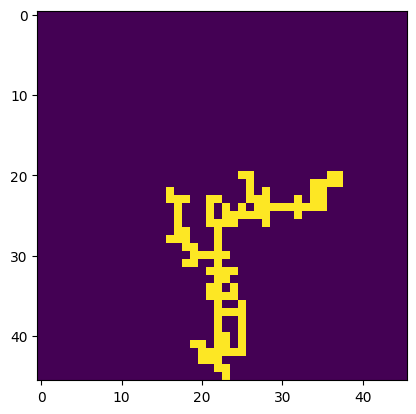

In [134]:
plt.imshow(MC_DLA_grid)
plt.show()